In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Problem 1

## Translate the following pseudocode into Python code. 

![Probelm1](ex1.jpg "Probelm 1")

Where $\rho = \frac{1}{\sqrt{2\pi\beta}} \cdot e^{\frac{-(x - x')^2}{2\beta}}$

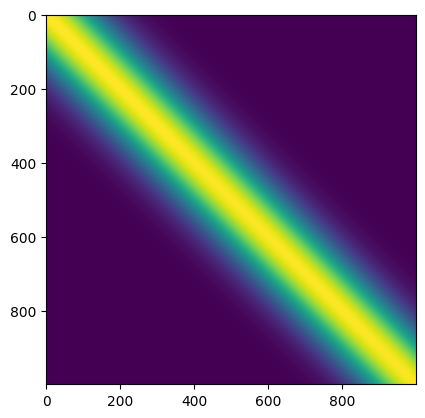

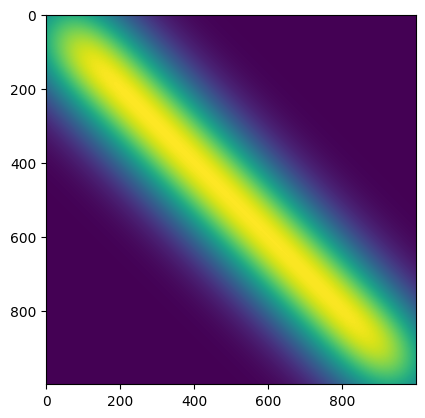

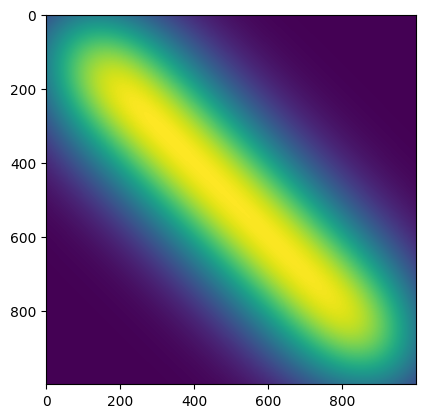

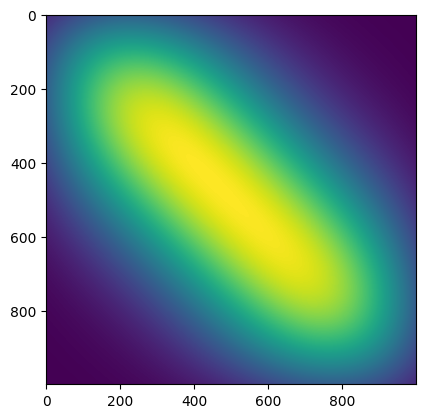

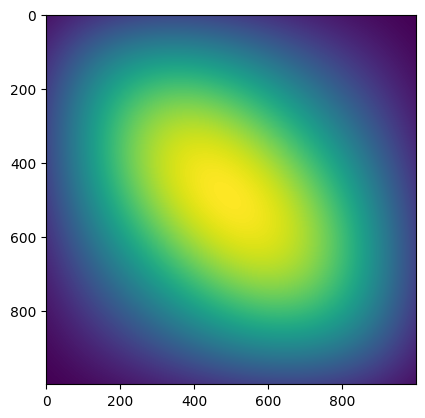

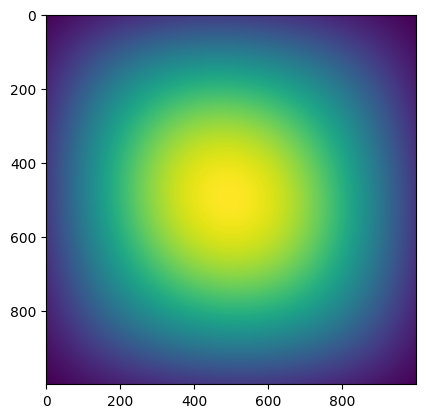

In [3]:
# density matrix, indicating correlation
# return a matrix
# for every intermediate point [x1, x2] with a step size delta x
# x1 and x2 are lists
# all possible pairs, then square and exp
def density(x1,x2,beta):
    n = len(x1)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i,j] = x1[i] - x2[j]
    return 1/(np.sqrt(2*np.pi*beta)) * np.exp(-(matrix**2)/(2*beta))


def harmonic(x,beta,k):
    return np.exp(-0.5*k*x) * density(x,x,beta) * np.exp(-0.5*k*x)



x = np.linspace(0,1,1000)
beta = 0.01
k = 0.005
dx = x[1]-x[0]
h = harmonic(x,beta,k)


for i in range(5):
    plt.imshow(h)
    plt.show()
    h = dx*(h@h)
plt.imshow(h)
plt.show()


# Problem 2

## Translate the following pseudocode into Python code.

![Probelm2](ex2.jpg "Probelm 2")

  0%|          | 0/1000000 [00:00<?, ?it/s]

100%|██████████| 1000000/1000000 [00:22<00:00, 44390.90it/s]


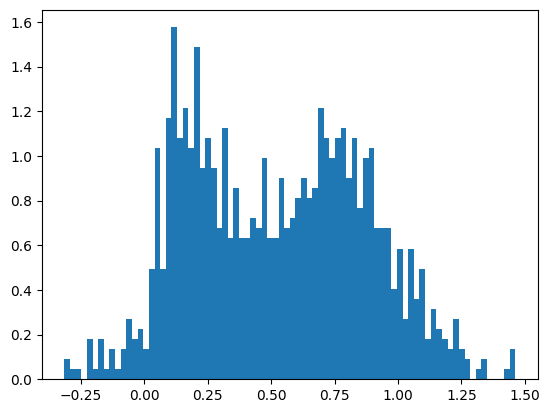

In [4]:
def rho(x0,x1,beta):
     return 1/(np.sqrt(2*np.pi*beta)) * np.exp(-(x1-x0)**2/(2*beta))

def randomWalk(x,beta):
    d=0.1
    n = len(x)
    dt = beta/n
    k = np.random.randint(0, n-2)
    xkp = x[k] + np.random.uniform(-d, d)
    kplus = k+1
    kminus = k-1
    if kminus == -1:
        kminus = n-1
    pia = rho(x[kminus], x[k], dt)*rho(x[k],x[kplus],dt)*np.exp(-0.5*dt*x[k]**2)
    pib = rho(x[kminus], xkp, dt)*rho(xkp, x[kplus],dt)*np.exp(-0.5*dt*xkp**2)
    if np.random.uniform(0,1) < pib/pia:
        x[k] = xkp
    return x

x = np.linspace(0,1,1000)
beta = 4
for i in tqdm(range(1_000_000)):
    x = randomWalk(x,beta)

plt.hist(x,bins=80, density=True)
plt.show()